Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Lab 8: Filtering


In this lab, you will be investigating the effects of using various filters on signals in the time and frequency domains. 

---


---

# Exercise 1:  

__Description__:   

In this exercise you will be implementing two filters in the time domain and comparing their effects when applied to the same timeseries. We will be using a seismic dataset that was collected 24 hours prior to a volcanic event. The data represent the vertical component of 3D ground motion, where ground velocity is measured in microns per second. Data were collected over 24 hours at a constant sampling rate during this time interval (HINT: use this information to refine your time axis when plotting).

The original dataset is very large, so for this exercise we will only be using the last 1000 samples. Before you begin, load `VOLCANOS.txt` and normalize the data by subtracting the mean of the original dataset.

__Questions__:   

  __a__. Smooth the data in the time domain by using a boxcar filter (moving average) with an 11-point, 31-point and 51-point kernel. Create one plot that demonstrates how the results change with the different filters. Discuss your results. __(12 points)__
  
  __b__. Filter the original timeseries using an 51-point Gaussian kernel that is designed to conserve energy (at least 99% of it). Play around with the standard deviation. Add this filtered dataset the plot from part __a__. __(7 points)__
  
  __c__. What might the benefits be of using a boxcar versus Gaussian filter?   __(2 points)__
  
---

In [2]:
import numpy as np 
from scipy import signal
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

SMALL_SIZE  = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font',   size     =BIGGER_SIZE)  # controls default text sizes
plt.rc('axes',   titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize =BIGGER_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# LOAD YOUR DATA HERE

# # YOUR CODE HERE
# raise NotImplementedError()

---
  __a__. Smooth the data in the time domain by using a boxcar filter (moving average) with an 11-point, 21-point and 51-point kernel. Create one plot that demonstrates how the results change with the different filters. Discuss your results. __(12 points)__
  
  __Hint__: It might be useful to define a function to smooth the data, where the inputs to the function would be the timeseries to be smoothed and the characteristics of the filter (e.g. the kernel size and shape). 
  
  __b__. Filter the original timeseries using an 51-point Gaussian kernel that is designed to conserve energy (at least 99% of it). Play around with the standard deviation. Add this filtered dataset the plot from part __a__. __(7 points)__
  
__Hint__: Take a look into [`scipy.signal.gaussian()`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.gaussian.html) for creating the Gaussian kernel. 


---

Text(0.1, 0.5, 'Plot the original and Gaussian filtered timeseries here (ax5)')

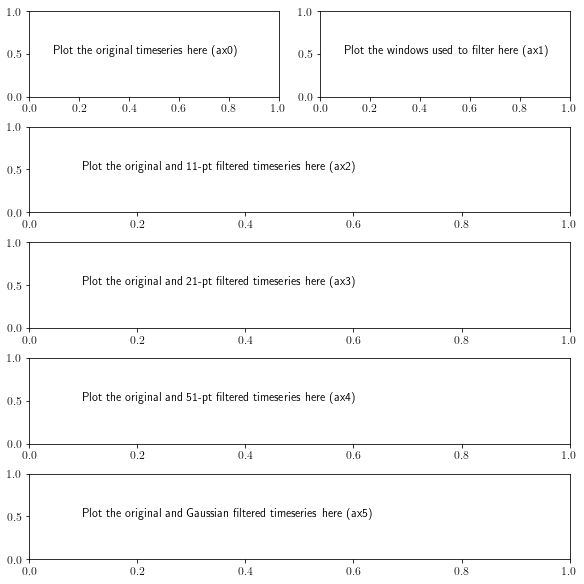

In [3]:
# Create a figure that permits multiple subplots of varying sizes
fig = plt.figure(figsize=(8,8), constrained_layout=True)
gs  = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, :])
ax5 = fig.add_subplot(gs[4, :])

# Create an array of axes
axes = [ax0, ax1, ax2, ax3, ax4, ax5]

# Annotate the figure to help clarify where each timeseries should be plotted. 
# Comment out (or delete) these annotations in your final submission. 
axes[0].text(0.1, 0.5, 'Plot the original timeseries here (ax0)',                  transform=ax0.transAxes)
axes[1].text(0.1, 0.5, 'Plot the windows used to filter here (ax1)' ,              transform=ax1.transAxes)
axes[2].text(0.1, 0.5, 'Plot the original and 11-pt filtered timeseries here (ax2)', transform=ax2.transAxes)
axes[3].text(0.1, 0.5, 'Plot the original and 21-pt filtered timeseries here (ax3)' ,transform=ax3.transAxes)
axes[4].text(0.1, 0.5, 'Plot the original and 51-pt filtered timeseries here (ax4)',transform=ax4.transAxes)
axes[5].text(0.1, 0.5, 'Plot the original and Gaussian filtered timeseries here (ax5)',transform=ax5.transAxes)

# # YOUR CODE HERE
# raise NotImplementedError()

---  
__a__ (continued). Discuss your results.

---

YOUR ANSWER HERE

---

 __c__. What might the benefits be of using a boxcar versus Gaussian filter?   __(2 points)__

---

YOUR ANSWER HERE

---


# Exercise 2: 

__Description__:

Microseismic, seismic and magma transport activity are common precursors to a volcanic eruption. These events are contained in the `VOLCANOS` data. Here we will use spectrograms (see https://en.wikipedia.org/wiki/Spectrogram) to visually determine the effects of high- and low-pass filtering. For this exercise we will use the first million samples of the _normalized_ `VOLCANOS` data.

__Questions__: 

__a__. Plot the data in time domain and plot the power spectrum.  __(4 points)__

__b__. Plot a spectrogram of the data (using `plt.pcolormesh`) and explain what the spectrogram
shows. __(2 points)__

  __Hint__: Use the function `spectrogram` that has been written for you. This is a ["wrapper function"](https://en.wikipedia.org/wiki/Wrapper_function), meaning the main purpose of the function is to call another function but with some specified arguments. You will need to pass arguments for `x` and `fs`, but can you use the default parameters for `t_out`, `norm`, `nperseg`, `noverlap` and `nfft`. You can check the docstring  of this function for an explanation of the parameters and an example of how to use the function. 
  
__c__. Create a low-pass and high-pass filter using `scipy.signal.butter`. Use a 5th-order filter for both (i.e. `N=5`). For the low-pass filter, use a critical frequency (`Wn`) of `0.25`.  For the high-pass filter, use a critical frequency `0.50`. You will need use the keyword argument `btype` to create the two types of filters.

Once you have created the filters, use them on the time-domain volcanic data with `scipy.signal.filtfilt`. Plot the spectrogram of your original data, your low-pass filtered data, and your high-pass filtered data (one plot with three subplots). Each subplot should have its own colorbar with consistent color limits between them (say from 0 to 100). 

Then plot the two filtered timeseries to compare with the original data plotted earlier in (a). Zoom in until you can see the effects of the high- and low-pass filters. __(14 points)__



__d__. What differences do you observe in the filtered data? __(2 points)__

---

In [ ]:
def spectrogram(x, fs=1.0, t_out="time", norm=False, nperseg=5000, noverlap=4000,  nfft=5000): 
    """ Wrapper for `scipy.signal.spectrogram`
        
        Compute the spectrogram analgous to the MATLAB style output. 
        
        Parameters
        ----------
        x : array_like
            Timeseries of measurement values
        t_out: string, optional 
            Return the t vector (x-axis of pcolormesh) as time ("time") or 
            as sample number ("sample").
        fs : float, optional
            Sampling frequency of the `x` time series. Defaults to 1.0.
        norm: bool, optional
            Normalize the frequency. Scaled b/w 0 and 1 w/ units of ($\pi$rad/sample)
        nperseg: int, optional
            Length of each segment. Default is 5000.
            See `scipy.signal.spectrogram` for more details.
        noverlap: int, optional
            Number of points to overlap between segments. Default is 4000.
            See `scipy.signal.spectrogram` for more details. 
        nfft: int, optional
            Length of the FFT used, if a zero padded FFT is desired. Defeault is 5000.
            See `scipy.signal.spectrogram` for more details.
        
        Returns
        -------
        f : ndarray
            Array of sample frequencies.
        t : ndarray
            Array of segment times (if t_out is "time") or sample number (if t_out is "sample")
        Sxx: ndarray
            Spectrogram of x. In units of power.
        
        Examples
        --------
        >>> from scipy import signal
        >>> import matplotlib.pyplot as plt
        
        Generate a test signal, a 2 Vrms sine wave whose frequency is slowly
        modulated around 3kHz, corrupted by white noise of exponentially
        decreasing magnitude sampled at 10 kHz. 
        (^^^^ This a very complicated way to generate a signal, but we are following 
        the example from "scipy.signal.spectrogram" )
        
        >>> fs = 10e3
        >>> N = 1e5
        >>> amp = 2 * np.sqrt(2)
        >>> noise_power = 0.01 * fs / 2
        >>> time = np.arange(N) / float(fs)
        >>> mod = 500*np.cos(2*np.pi*0.25*time)
        >>> carrier = amp * np.sin(2*np.pi*3e3*time + mod)
        >>> noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
        >>> noise *= np.exp(-time/5)
        >>> x = carrier + noise
        
        Compute and plot the spectrogram.
        
        >>> f, t, Sxx = spectrogram(x, fs)
        >>> plt.pcolormesh(t, f, Sxx, shading='gouraud')
        >>> # This y-axis label assumes "norm=False"
        >>> plt.ylabel('Frequency [Hz]')
        >>> # This x-axis t assumes "t_out=time"
        >>> plt.xlabel('Time')
        >>> # This colorbar label assumes "norm=False"
        >>> plt.colorbar(label='Power (dB)')
    """
    import scipy.signal as signal
    
    # Make sure that the "t_out" variable is passed 
    if t_out not in ["time", "sample"]:
        raise ValueError('unknown value for t_out {}, must be one of {}'
                         .format(t_out, ["time", "sample"]))
        
    # Calculate the spectrogram with scipy.signal 
    f, t, Sxx = signal.spectrogram(x, fs=fs,
                                   nperseg=nperseg, 
                                   noverlap=noverlap, 
                                   nfft=nfft,
                                   scaling='spectrum'
                                   )
    # Convert the spectrogram from scipy default to power in dB
    Sxx = 10*np.log10(Sxx)
    # Normalize frequency if kwarg passed
    if norm == True: 
        f /= np.max(f)
    # Let's check how the time data should be returned
    if t_out == "sample":
        t = np.linspace(0, t[-1] / dt, t.shape[0])
        
    return f, t, Sxx

In [ ]:
import scipy.fft as fft

# LOAD YOUR DATA HERE

# print(data.size) => 4320000

# YOUR CODE HERE
raise NotImplementedError()

---
__a__. Plot the data in time domain and plot the power spectrum.  __(4 points)__

---

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

---
__b__. Plot a spectrogram of the data (using `plt.pcolormesh`) and explain what the spectrogram
shows. Set the `vmin` and `vmax` within `plt.pcolormesh` so that the colorbar is scaled between 0 and 100. __(4 points)__

  __Hint__: Use the function `spectrogram` that has been written for you. This is a ["wrapper function"](https://en.wikipedia.org/wiki/Wrapper_function), meaning the main purpose of the function is to call another function but with some specified arguments. You will need to pass arguments for `x` and `fs`, but can you use the default parameters for `t_out`, `norm`, `nperseg`, `noverlap` and `nfft`. You can check the docstring  of this function for an explanation of the parameters and an example of how to use the function.  
  

---

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

__b__. (cont.) .....explain what the spectrogram shows.

YOUR ANSWER HERE

---

__c__. Create a low-pass and high-pass filter using `scipy.signal.butter`. Use a 5th-order filter for both (i.e. `N=5`). For the low-pass filter, use a critical relative frequency (`Wn`) of `0.25`.  For the high-pass filter, use a critical relative frequency `0.50`. You will need use the keyword argument `btype` to create the two types of filters.

Once you have created the filters, use them on the time-domain volcanic data with `scipy.signal.filtfilt`. Plot the spectrogram of your original data, your low-pass filtered data, and your high-pass filtered data (one plot with three subplots). Each subplot should have its own colorbar with consistent color limits between them (say from 0 to 100). 

Then plot the two filtered timeseries to compare with the original data plotted earlier in (a). Zoom in until you can see the effects of the high- and low-pass filters. __(14 points)__

---

In [ ]:
# Create the figure and axes instances
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, 
                       figsize=(8,8), constrained_layout=True)

# YOUR CODE HERE
raise NotImplementedError()

---
__c__. (cont.) Then plot the two filtered timeseries to compare with the original data plotted earlier in (a). Zoom in until you can see the effects of the high- and low-pass filters. 

---

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----
__d__. What differences do you observe in the filtered data? __(2 points)__

----

YOUR ANSWER HERE

---

# Exercise 3:

__Questions__: 

__a__. What are the characteristics of a linear time-invariant system?  __(1 point)__   
__b__. Explain causality in the context of filters used for timeseries.  __(2 points)__   
__c__. Describe the utility of using a high-pass or low-pass filter when processing geoscience data. __(3 points)__  

---

---
__a__. What are the characteristics of a linear time-invariant system?  __(1 point)__   

---

YOUR ANSWER HERE

---
__b__. Explain causality in the context of filters used for timeseries.  __(2 points)__   

---

YOUR ANSWER HERE

---

__c__. Describe the utility of using a high-pass or low-pass filter when processing geoscience data. __(3 points)__  

---

YOUR ANSWER HERE

In [ ]:
# You are free to add more cells here or throughout the notebook as needed. 